# Project 4: Finding Heavy Traffic Indicators on I-94

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. 

Source: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume?fbclid=IwAR3O40sPioZfBCoGh07Z3jlNeCrjBF16ldSu7e23mAnadWZRLFaUeRJyDnA#

## I. Openning data


In [61]:
import pandas as pd 
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
import warnings
warnings.filterwarnings('ignore')
i_94.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [62]:
i_94.head(2)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516


In [63]:
i_94.tail(2)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [64]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [65]:
i_94['traffic_volume'].value_counts(bins=10)  #bins = 10: chia thanh 10 khoang

(-7.281000000000001, 728.0]    8095
(4368.0, 5096.0]               7886
(5096.0, 5824.0]               5634
(728.0, 1456.0]                5100
(2184.0, 2912.0]               4765
(2912.0, 3640.0]               4761
(3640.0, 4368.0]               4349
(5824.0, 6552.0]               3854
(1456.0, 2184.0]               2835
(6552.0, 7280.0]                925
Name: traffic_volume, dtype: int64

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

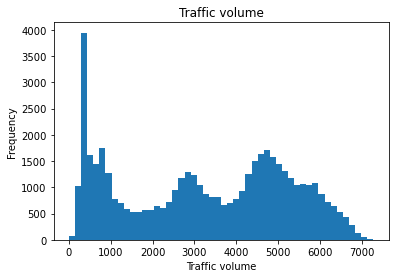

In [67]:
i_94['traffic_volume'].plot.hist(bins=50)   #histogram
plt.xlabel('Traffic volume')
plt.title('Traffic volume')
plt.show()

In [68]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

In [69]:
i_94['date_time'].describe()

count                   48204
unique                  40575
top       2013-04-18 22:00:00
freq                        6
first     2012-10-02 09:00:00
last      2018-09-30 23:00:00
Name: date_time, dtype: object

## Traffic volume: day vs night
We devide the dataset into two parts:
- Datetime data: from 7am to 7pm
- Nighttime data: from 7pm to 7am

In [70]:
day = i_94.copy()[(i_94['date_time'].dt.hour >= 7)&(i_94['date_time'].dt.hour <19)] #1 khoang tu 7am - 7pm
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB


In [71]:
night = i_94.copy()[(i_94['date_time'].dt.hour >= 19)|(i_94['date_time'].dt.hour <7)] #2 khoang truoc 7am hoac sau 7pm
night.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              24327 non-null  object        
 1   temp                 24327 non-null  float64       
 2   rain_1h              24327 non-null  float64       
 3   snow_1h              24327 non-null  float64       
 4   clouds_all           24327 non-null  int64         
 5   weather_main         24327 non-null  object        
 6   weather_description  24327 non-null  object        
 7   date_time            24327 non-null  datetime64[ns]
 8   traffic_volume       24327 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.9+ MB


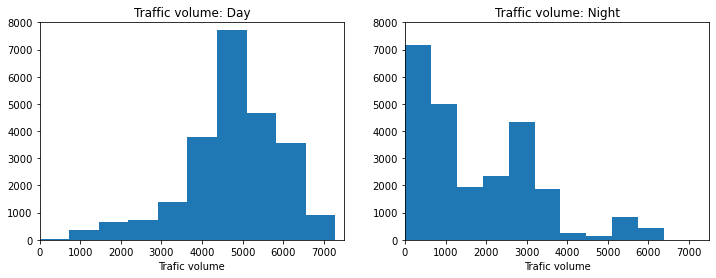

In [72]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlim(0,7500)
plt.ylim(0,8000)
plt.title('Traffic volume: Day')
plt.xlabel('Trafic volume')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(0,7500)
plt.ylim(0,8000)
plt.title('Traffic volume: Night')
plt.xlabel('Trafic volume')

plt.show()

### Conclusion: day

In [73]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

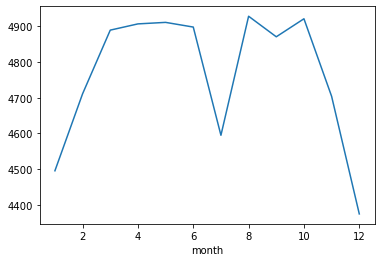

In [74]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month')['traffic_volume'].mean()  #group cac dong co thang nhu nhau, bieu thi gia tri trung binh cua traffic volume
by_month.plot.line()
plt.show()

The traffic looks less heavy during cold months (November - Jebruary) and more intense during warm months (March - October)

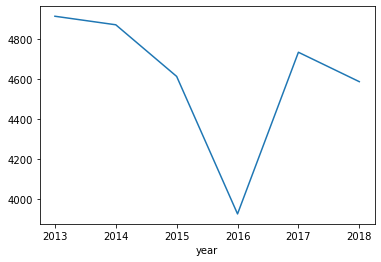

In [75]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7].groupby('year')['traffic_volume'].mean()
only_july.plot.line()
plt.show()

The reason of this exception in 2016 is the construction in I-94 with this article: 

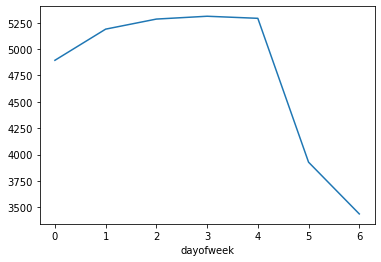

In [76]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek')['traffic_volume'].mean()
by_dayofweek.plot.line()
plt.show()

During business day, the traffic volume is about 5000. And during weekends, the traffic volume is below 4000

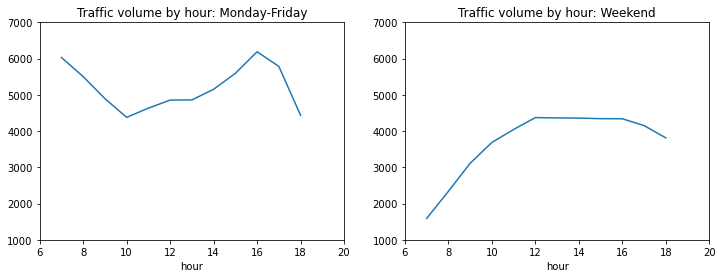

In [77]:
day['hour'] = day['date_time'].dt.hour
business_day = day.copy()[day['dayofweek']<=4]
weekend = day.copy()[day['dayofweek']>4]
by_business_day = business_day.groupby('hour')['traffic_volume'].mean()
by_weekend = weekend.groupby('hour')['traffic_volume'].mean()
plt.figure(figsize =(12,4))
plt.subplot(1,2,1)
by_business_day.plot.line()
plt.xlim(6,20)
plt.ylim(1000,7000)
plt.title('Traffic volume by hour: Monday-Friday')
plt.subplot(1,2,2)
by_weekend.plot.line()
plt.xlim(6,20)
plt.ylim(1000,7000)
plt.title('Traffic volume by hour: Weekend')

plt.show()

The rush hour are roud 7 and 16 - when most people travel from home to work and back. We can see volumes of over 6000 cars at rush hour

In [78]:
day.corr()['traffic_volume'] #0: ko co mqh tuong quan tuyen tinh, -1: co mqh tuong quan tuyen tinh am, +1: co mqh tuong quan tuyen tinh duong

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

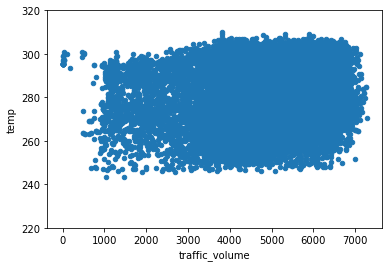

In [79]:
day.plot.scatter('traffic_volume','temp')
plt.ylim(220,320)
plt.show()

We can conclude that the temperature doesn't look like a strong indicator of heavy traffic

In [80]:
day.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'month', 'year',
       'dayofweek', 'hour'],
      dtype='object')

In [81]:
day['weather_main'].value_counts().head()

Clouds    8702
Clear     5744
Rain      2841
Mist      2593
Snow      1454
Name: weather_main, dtype: int64

In [82]:
day['weather_description'].value_counts().head()

sky is clear        4892
broken clouds       2793
mist                2593
overcast clouds     2585
scattered clouds    2181
Name: weather_description, dtype: int64

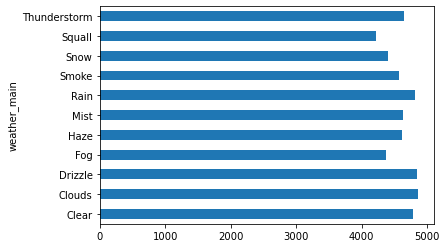

In [83]:
by_weather_main = day.groupby('weather_main')['traffic_volume'].mean()
by_weather_main.plot.barh()
plt.show()

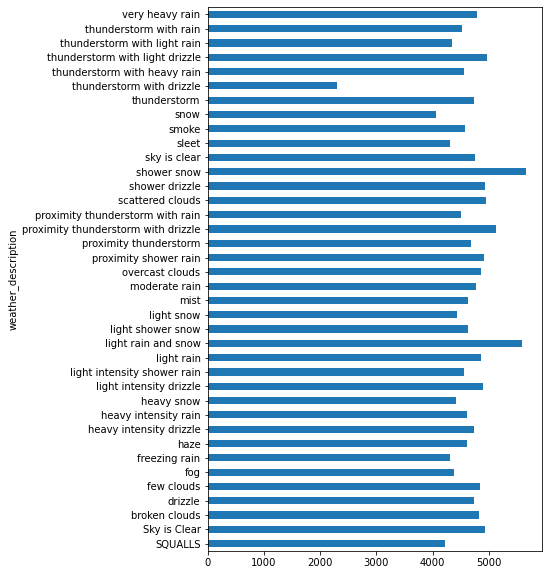

In [84]:
by_weather_description = day.groupby('weather_description')['traffic_volume'].mean()
by_weather_description.plot.barh(figsize = (6,10))
plt.show()

The 3 weathers types where the traffic volume exceeds 5000 cars:
- shower snow
- light rain and snow
- proximity thunderstorm with drizzle

### Conclusion: 
The traffic looks less heavy during cold months (November - Jebruary) and more intense during warm months (March - October)
During business day, the traffic volume is about 5000. And during weekends, the traffic volume is below 4000
The rush hour are roud 7 and 16 - when most people travel from home to work and back. We can see volumes of over 6000 cars at rush hour
The 3 weathers types where the traffic volume exceeds 5000 cars:
- shower snow
- light rain and snow
- proximity thunderstorm with drizzle